## Stroke Analysis

    

#### 

According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths.

This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.

#### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Read and view the dataset

In [2]:
d=pd.read_csv('healthcare-dataset-stroke-data.csv')
d

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


#### Checking the shape,datatypes,information,describe,missing values

In [3]:
d.shape

(5110, 12)

In [4]:
d.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
d.fillna(0,axis=1,inplace=True)

In [6]:
d.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
d.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [8]:
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [9]:
d.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,27.756732,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,9.529497,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,0.000000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,22.900000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,27.700000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


#### Read the top and bottom records

In [10]:
d.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,0.0,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [11]:
d.tail()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,0.0,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


### Droping the columns

In [12]:
d.drop(['id','Residence_type',
        'bmi','avg_glucose_level','ever_married'],axis=1,inplace=True)

In [13]:
d

,gender,age,hypertension,heart_disease,work_type,smoking_status,stroke
0,Male,67.0,0,1,Private,formerly smoked,1
1,Female,61.0,0,0,Self-employed,never smoked,1
2,Male,80.0,0,1,Private,never smoked,1
3,Female,49.0,0,0,Private,smokes,1
4,Female,79.0,1,0,Self-employed,never smoked,1
...,...,...,...,...,...,...,...
5105,Female,80.0,1,0,Private,never smoked,0
5106,Female,81.0,0,0,Self-employed,never smoked,0
5107,Female,35.0,0,0,Self-employed,never smoked,0
5108,Male,51.0,0,0,Private,formerly smoked,0


## Logistic regression

### checking gender for causing stroke

In [15]:
d.gender=d.gender.replace({'Male':1,'Female':0,'Other':2})
    

In [16]:
gender_wise=pd.crosstab(d['gender'],d['stroke'])
gender_wise

stroke,0,1
gender,,
0,2853,141
1,2007,108
2,1,0


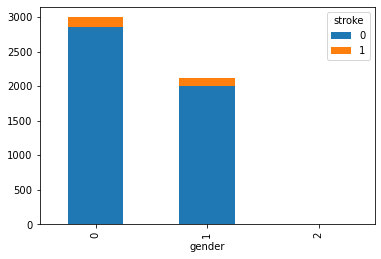

In [17]:
gender_wise.plot(kind='bar',stacked=True)
plt.show()

### Checking age for causing stroke

In [18]:
def agevalue(age):
    if age<30:
        return '1'
    elif age<60:
        return '2'
    else:
        return '3'

In [19]:
d['age']=d['age'].apply(agevalue)

In [20]:
age_wise=pd.crosstab(d['age'],d['stroke'])
age_wise

stroke,0,1
age,,
1,1513,2
2,2153,66
3,1195,181


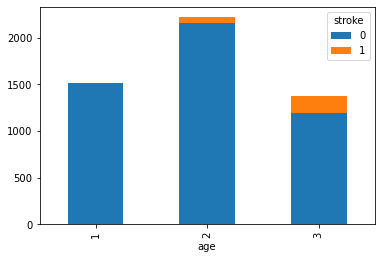

In [21]:
age_wise.plot(kind='bar',stacked=True)
plt.show()

### Checking hypertension for causing stroke

In [22]:
tension_wise=pd.crosstab(d['hypertension'],d['stroke'])
tension_wise

stroke,0,1
hypertension,,
0,4429,183
1,432,66


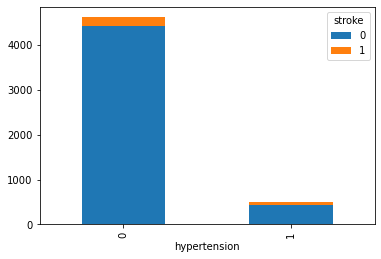

In [23]:
tension_wise.plot(kind='bar',stacked=True)
plt.show()

### Checking heart disease for causing stroke

In [24]:
heartdisease_wise=pd.crosstab(d['heart_disease'],d['stroke'])
heartdisease_wise

stroke,0,1
heart_disease,,
0,4632,202
1,229,47


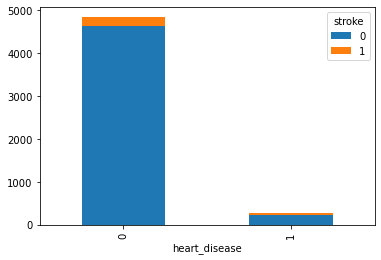

In [25]:
heartdisease_wise.plot(kind='bar',stacked=True)
plt.show()

### Checking worktype for causing stroke

In [26]:
d.work_type=d.work_type.replace({'Private':1, 'Self-employed':2, 'Govt_job':3, 'children':4, 'Never_worked':5})

In [27]:
work_wise=pd.crosstab(d['work_type'],d['stroke'])
work_wise

stroke,0,1
work_type,,
1,2776,149
2,754,65
3,624,33
4,685,2
5,22,0


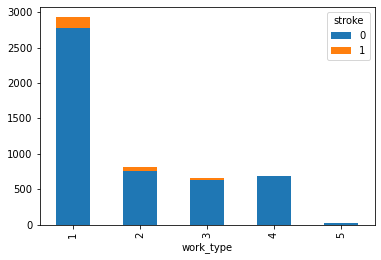

In [28]:
work_wise.plot(kind='bar',stacked=True)
plt.show()

### Checking smoke status for causing stroke

In [29]:
d.smoking_status=d.smoking_status.replace({'formerly smoked':2, 
                                   'never smoked':1, 'smokes':3,
                                           'Unknown':0})

In [30]:
smoke_wise=pd.crosstab(d['smoking_status'],d['stroke'])
smoke_wise

stroke,0,1
smoking_status,,
0,1497,47
1,1802,90
2,815,70
3,747,42


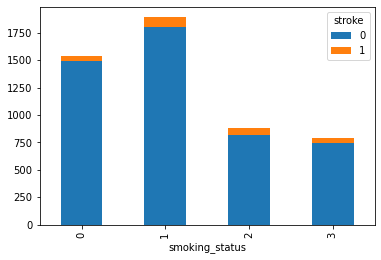

In [31]:
smoke_wise.plot(kind='bar',stacked=True)
plt.show()

### Importing libraries for logistic regression

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [33]:
y=d['stroke']
x=d.drop(['stroke'],axis=1)

In [34]:
x

,gender,age,hypertension,heart_disease,work_type,smoking_status
0,1,3,0,1,1,2
1,0,3,0,0,2,1
2,1,3,0,1,1,1
3,0,2,0,0,1,3
4,0,3,1,0,2,1
...,...,...,...,...,...,...
5105,0,3,1,0,1,1
5106,0,3,0,0,2,1
5107,0,2,0,0,2,1
5108,1,2,0,0,1,2


In [35]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [36]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(4088, 6)
(1022, 6)
(4088,)
(1022,)


In [37]:
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
model.score(x_train,y_train)

0.9537671232876712

In [40]:
model.score(x_test,y_test)

0.9412915851272016

### Accuracy  score

In [41]:
from sklearn.metrics import accuracy_score

In [42]:
accuracy_score(y_test,y_pred)*100

94.12915851272015

### Importing confusion matrix and plotting it

In [43]:
from sklearn.metrics import confusion_matrix

In [44]:
performance=confusion_matrix(y_test,y_pred)
performance

array([[962,   0],
       [ 60,   0]], dtype=int64)

In [45]:
from sklearn.metrics import plot_confusion_matrix

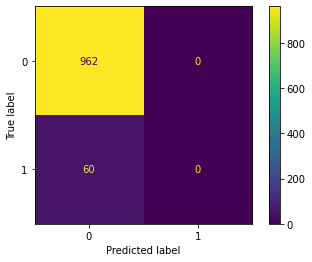

In [46]:
plot_confusion_matrix(model,x_test,y_test)
plt.show()

## Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

In [48]:
model1=DecisionTreeClassifier()
model1.fit(x_train,y_train)

DecisionTreeClassifier()

In [49]:
model1.score(x_train,y_train)

0.9552348336594912

In [50]:
model1.score(x_test,y_test)

0.9383561643835616

In [51]:
y_predict=model1.predict(x_test)

In [52]:
accuracy_score(y_test,y_predict)*100

93.83561643835617

In [53]:
performance=confusion_matrix(y_test,y_predict)
performance

array([[959,   3],
       [ 60,   0]], dtype=int64)

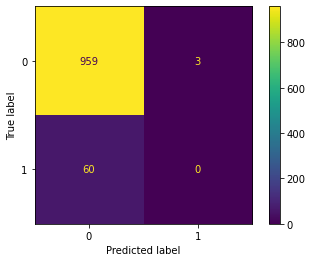

In [54]:
plot_confusion_matrix(model1,x_test,y_test)
plt.show()

## Random forest

In [55]:
from sklearn.ensemble import RandomForestClassifier

In [56]:
model2=RandomForestClassifier(n_estimators=20)
model2.fit(x_train,y_train)

RandomForestClassifier(n_estimators=20)

In [57]:
model2.score(x_train,y_train)

0.9552348336594912

In [58]:
model2.score(x_test,y_test)

0.9363992172211351

In [61]:
y_predic=model2.predict(x_test)

In [62]:
accuracy_score(y_test,y_predic)*100

93.63992172211351

In [63]:
performance=confusion_matrix(y_test,y_predic)
performance

array([[957,   5],
       [ 60,   0]], dtype=int64)

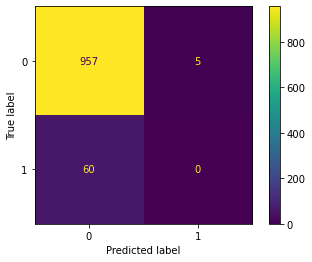

In [64]:
plot_confusion_matrix(model2,x_test,y_test)
plt.show()

### Observation
 1.Logestic Regression - the accuracy of the data is 94%
 
 2.Decision Tree - the accuracy of the data is 93%
 
 3.Random Forest - the accuracy of the data is 93%


## Conclusion

 The analysis of stroke data using different machince learning    methods shows the accuracy of the dataset and the 
 chances of having stroke.The data has the accuracy score 94%.